In [1]:
import matplotlib.pyplot as plt
from scipy import signal
import math
import random
import numpy as np
from scipy import stats

In [2]:
# Upload well data

well_points = np.loadtxt('data/anon_well_points.txt')

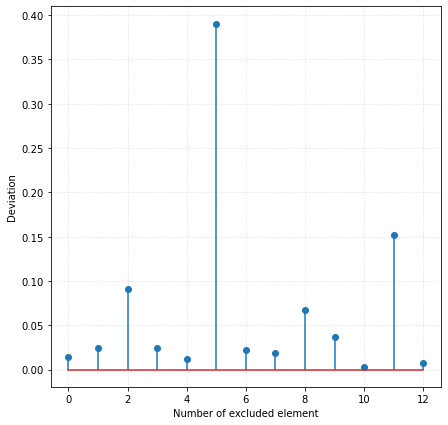

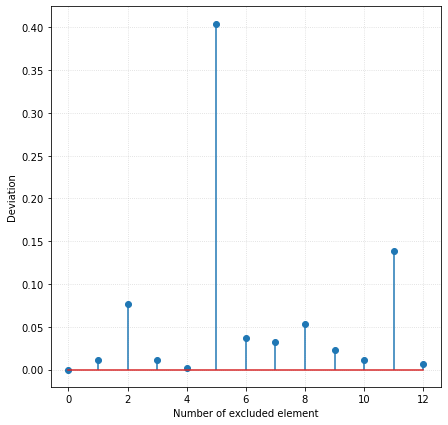

In [3]:
# Proving stability of regression


x = well_points[:,2] # Depth
y = well_points[:,3] # Validation error
slope, intercept, rvalue = stats.linregress(x, y)[0:3]
# Array of correlation coeffitient 

base_rvalue = rvalue

r_massive = [rvalue]
i = 1
r_summ = rvalue

for q in range(len(x)):
    x_new = list(filter(lambda t : t != x[q], x))
    y_new = list(filter(lambda x : x != y[q], y))
    slope, intercept, rvalue = stats.linregress(x_new, y_new)[0:3]
    r_massive.append(rvalue)
    i += 1
    r_summ = r_summ + rvalue
    
    

# Average correlation coeffitient

average_r = r_summ / i
deviation_r = [] 
# Deviation from average depending in number of excluded element
for qq in r_massive:
    dev = abs(average_r - qq)
    deviation_r.append(dev)
    
plt.figure(figsize=(7,7))
plt.stem(range(len(x) + 1), deviation_r)
plt.xlabel('Number of excluded element')
plt.ylabel('Deviation')
plt.grid(ls=':',alpha=.5)
plt.show()    

# Deviation from average (calculated with all points included)

deviation_r2 = []



for ii in r_massive:
    dev = abs(base_rvalue - ii)
    deviation_r2.append(dev)
    
plt.figure(figsize=(7,7))
plt.stem(range(len(x) + 1), deviation_r2)
plt.xlabel('Number of excluded element')
plt.ylabel('Deviation')
plt.grid(ls=':',alpha=.5)
plt.show()    
    

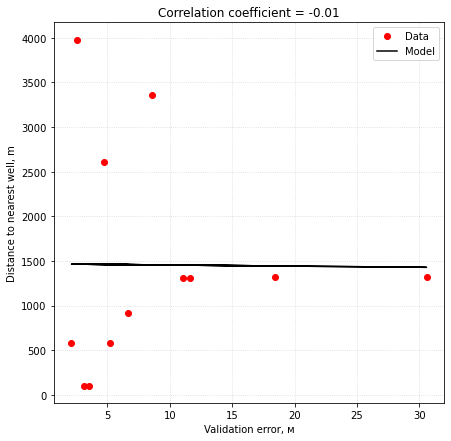

In [6]:
# Correlation 

# Coordinates of wells
point_x = well_points[:,0]
point_y = well_points[:,1]
# Validation error
valid_err = well_points[:,3]

min_dist_massive = []

for i in range(len(valid_err)):
    d = []
    for j in range(len(valid_err)):
        distance = ((point_x[i]-point_x[j])**2 + (point_y[i]-point_y[j])**2)**0.5
        if distance != 0:
            d.append(distance)    
    dd = min(d)
    min_dist_massive.append(dd)
    
x = valid_err # depth
y = min_dist_massive # validation error

slope, intercept, rvalue = stats.linregress(x, y)[0:3] # regression attributes

y_est = intercept + slope*x # forecast


plt.figure(figsize=(7,7))
plt.plot(x, y, 'or', label='Data')
plt.plot(x, y_est, 'k', label='Model')
plt.title('Correlation coefficient = %.2f' % rvalue)
plt.xlabel('Validation error, м')
plt.ylabel('Distance to nearest well, m')
plt.grid(ls=':',alpha=.5)
plt.legend()
plt.show()

In [8]:
# Import grid with depth values
map_grid = np.loadtxt('data/anon_map_points.txt')

Calculate the angle map, assign the angle to the midpoint between the coordinates, the search will go along the X axis y = const.
First we calculate on the X axis, then on the Y axis.

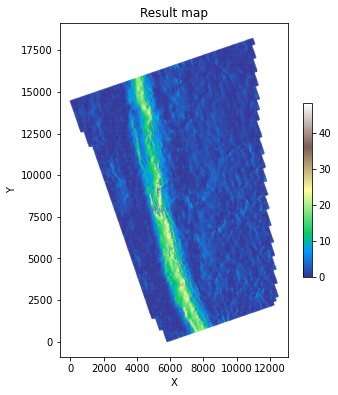

In [9]:
counter = 0
coordY = map_grid[:, 1]
coordX = map_grid[:, 0]
height = map_grid[:, 2]
coord_x_angle = []
coord_y_angle = []
angle = []
for i in range(len(coordY) - 1):
    if coordY[i] == coordY[i+1]:
        coord_x_angle.append((coordX[i] + coordX[i+1])/ 2)
        coord_y_angle.append((coordY[i] + coordY[i+1])/ 2)
        angle.append(abs(math.atan((height[i+1] - height[i])/math.sqrt((coordX[i+1] - coordX[i])**2 + (coordY[i+1] - coordY[i])**2))*180 / math.pi))

map_angle_grid = np.array([coord_x_angle, coord_y_angle, angle])  

plt.figure(figsize=(5,10))
plt.scatter(x=coord_x_angle,y=coord_y_angle,c=angle,s=0.02, cmap='terrain')
plt.title('Result map')
plt.xlabel('X')
plt.ylabel('Y')
plt.axis('Scaled')
plt.tight_layout()
plt.colorbar(shrink=0.25)
        
       

In [10]:
# Write array of angles to .txt
np.savetxt('new_map.txt', map_angle_grid)

[9.339425672401942, 0.8906988509575199, 2.205693366436368, 0.8134995635448152, 21.240676029322863, 1.4813020623287663, 1.853632382187648, 2.8635231356916524, 2.752441780003446, 0.550558826074912, 2.114619541634135, 1.6099015776957089]
[ 6.64  2.59  4.73 11.08 30.59  3.13  3.49  8.54 11.59  2.11 18.4   5.22]


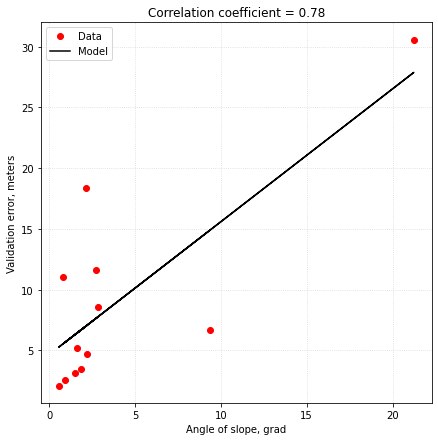

4.661631435763781 1.0933534353856653


In [15]:
# Find nearest points with values of angles to points of wells
well_x = well_points[:, 0]
well_y = well_points[:, 1]

corr_angles = []

for q in range(len(well_x)):
    dist_list = []
    for r in range(len(coord_x_angle)):
        dist_list.append(((well_x[q]-coord_x_angle[r])**2 + (well_y[q]-coord_y_angle[r])**2)**0.5)
    prm = min(dist_list)
    corr_angles.append(angle[int(np.argwhere(dist_list==prm))]) 

valid_err = well_points[:, 3]
print(corr_angles)
print(valid_err)

slope, intercept, rvalue = stats.linregress(corr_angles, valid_err)[0:3]

x = np.array(corr_angles)

y_est = intercept + slope*x 


plt.figure(figsize=(7,7))
plt.plot(corr_angles, valid_err, 'or', label='Data')
plt.plot(corr_angles, y_est, 'k', label='Model')
plt.title('Correlation coefficient = %.2f' % rvalue)
plt.xlabel('Angle of slope, grad')
plt.ylabel('Validation error, meters')
plt.grid(ls=':',alpha=.5)
plt.legend()
plt.show()

print(intercept, slope)

0.7783567730733205
0.8425209323851234
0.7717279086014692
0.7767606086932374
0.8056059472523006
0.10862176538946695
0.7749257153824961
0.7767631165969013
0.7787954742227058
0.790225997919454
0.7698916822238577
0.8752678277691894
0.7743855134033829


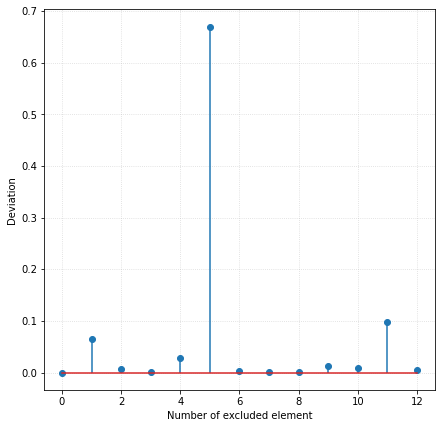

In [18]:
x = np.array(corr_angles)
y = valid_err
slope, intercept, rvalue = stats.linregress(x, y)[0:3]

base_rvalue = rvalue
r_massive = [rvalue]
i = 1
r_summ = rvalue

for q in range(len(x)):
    x_new = list(filter(lambda t : t != x[q], x))
    y_new = list(filter(lambda x : x != y[q], y))
    slope, intercept, rvalue = stats.linregress(x_new, y_new)[0:3]
    r_massive.append(rvalue)
    i += 1
    r_summ = r_summ + rvalue
    
    

# Average correlation coeffitient

average_r = r_summ / i
deviation_r = [] 
# Deviation from average depending in number of excluded element
for qq in r_massive:
    dev = abs(average_r - qq)
    deviation_r.append(dev)
    
# Deviation from average (calculated with all points included)

deviation_r2 = []


for ii in r_massive:
    dev = abs(base_rvalue - ii)
    deviation_r2.append(dev)
    print(ii)
    
plt.figure(figsize=(7,7))
plt.stem(range(len(x) + 1), deviation_r2)
plt.xlabel('Number of excluded element')
plt.ylabel('Deviation')
plt.grid(ls=':',alpha=.5)
plt.show()    

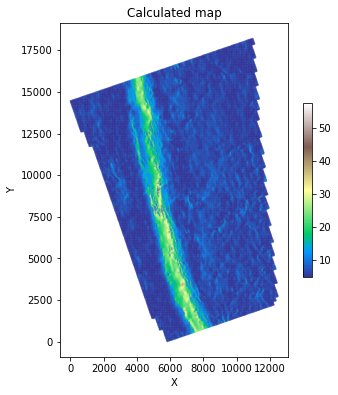

In [19]:
# Error map

intercept = 4.661631435763781
slope = 1.0933534353856653

ep_x = []
ep_y = []
ep_er = []

for y in range(len(angle)):
    ep_x.append(coord_x_angle[y])
    ep_y.append(coord_y_angle[y])
    ep_er.append(intercept + slope * angle[y])
    
plt.figure(figsize=(5,10))
plt.scatter(x=ep_x,y=ep_y,c=ep_er,s=0.02, cmap='terrain')
plt.title('Calculated map')
plt.xlabel('X')
plt.ylabel('Y')
plt.axis('Scaled')
plt.tight_layout()
plt.colorbar(shrink=0.25)    

Regression is unstable, map can't be used for forecast of error